<a href="https://colab.research.google.com/github/AryanPatial/Aryan_INFO5731_Spring2025/blob/main/Patial_Aryan_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import pandas as pd
import spacy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = "/content/drive/MyDrive/tweets_cleaned.csv"
df = pd.read_csv(file_path)

df.head()

Mounted at /content/drive


,tweet_id,text,username,cleaned_tweets
0,1891948552567521751,Why #smallAImodels can’t keep up with large on...,andresvilarino,why smallaimodels cant keep up with large ones...
1,1891948552483479996,"Google has quietly revised its AI Principles, ...",aixsummit,google has quietly revised its ai principles r...
2,1891948483881357788,"After an incident, the last thing you want to ...",Matt3rai,after an incident the last thing you want to w...
3,1891948463375409358,Ex-OpenAI CTO Mira Murati launches Thinking Ma...,NewsOrbitX,exopenai cto mira murati launches thinking mac...
4,1891948383138398369,AI's Influence on Drug Discovery! 💊🤔🤖\n\n#m2mt...,m2mtechconnect,ais influence on drug discovery mmtechbytes cy...


In [ ]:
#Ans1)
import pandas as pd
from collections import Counter

def create_ngrams(sentence, size):
    words = sentence.split()
    ngram_list = []
    for i in range(len(words) - size + 1):
        ngram = " ".join(words[i:i + size])
        ngram_list.append(ngram)
    return ngram_list

bigrams_collection = []
trigrams_collection = []

for tweet in df['cleaned_tweets']:
    bigrams_collection.extend(create_ngrams(tweet, 2))
    trigrams_collection.extend(create_ngrams(tweet, 3))

bigrams_frequency = dict(Counter(bigrams_collection))
trigrams_frequency = dict(Counter(trigrams_collection))

# Show the results
print("Bigram Counts:", bigrams_frequency)
print("Trigram Counts:", trigrams_frequency)

Bigram Counts: {'why smallaimodels': 1, 'smallaimodels cant': 1, 'cant keep': 1, 'keep up': 1, 'up with': 1, 'with large': 1, 'large ones': 1, 'ones largelanguagemodels': 1, 'largelanguagemodels llms': 2, 'llms ai': 1, 'ai artificialintelligence': 22, 'artificialintelligence tech': 2, 'tech technology': 2, 'google has': 3, 'has quietly': 2, 'quietly revised': 2, 'revised its': 2, 'its ai': 2, 'ai principles': 2, 'principles removing': 2, 'removing a': 2, 'a longstanding': 2, 'longstanding pledge': 2, 'pledge not': 2, 'not to': 2, 'to develop': 2, 'develop ai': 2, 'ai for': 3, 'for weapons': 2, 'weapons and': 2, 'and surveillance': 2, 'surveillance applications': 2, 'applications google': 2, 'google llms': 2, 'llms datascience': 3, 'datascience ai': 4, 'after an': 1, 'an incident': 1, 'incident the': 1, 'the last': 1, 'last thing': 1, 'thing you': 1, 'you want': 1, 'want to': 1, 'to worry': 1, 'worry about': 1, 'about is': 1, 'is sifting': 1, 'sifting through': 1, 'through hours': 1, 'h

In [ ]:
#Ans2)
unigram_frequency = {}

for tweet in df['cleaned_tweets']:
    words = tweet.split()
    for word in words:
        if word in unigram_frequency:
            unigram_frequency[word] += 1
        else:
            unigram_frequency[word] = 1

bigram_probabilities = {}

for bigram, bigram_count in bigrams_frequency.items():
    w1 = bigram.split()[0]
    if w1 in unigram_frequency:
        bigram_probabilities[bigram] = bigram_count / unigram_frequency[w1]

print("Bigram Probabilities:", bigram_probabilities)


Bigram Probabilities: {'why smallaimodels': 1.0, 'smallaimodels cant': 1.0, 'cant keep': 1.0, 'keep up': 0.5, 'up with': 1.0, 'with large': 0.03225806451612903, 'large ones': 0.5, 'ones largelanguagemodels': 1.0, 'largelanguagemodels llms': 1.0, 'llms ai': 0.125, 'ai artificialintelligence': 0.18487394957983194, 'artificialintelligence tech': 0.029850746268656716, 'tech technology': 0.25, 'google has': 0.42857142857142855, 'has quietly': 0.5, 'quietly revised': 1.0, 'revised its': 1.0, 'its ai': 0.2, 'ai principles': 0.01680672268907563, 'principles removing': 1.0, 'removing a': 1.0, 'a longstanding': 0.05, 'longstanding pledge': 1.0, 'pledge not': 1.0, 'not to': 0.6666666666666666, 'to develop': 0.05128205128205128, 'develop ai': 1.0, 'ai for': 0.025210084033613446, 'for weapons': 0.07142857142857142, 'weapons and': 1.0, 'and surveillance': 0.05263157894736842, 'surveillance applications': 1.0, 'applications google': 1.0, 'google llms': 0.2857142857142857, 'llms datascience': 0.375, '

In [12]:
#Ans3)
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

# Function to extract noun phrases
def extract_noun_phrases(text):
    doc = nlp(text)
    return [" ".join(chunk.text.lower().split()) for chunk in doc.noun_chunks]


review_noun_phrase_freq = []

for tweet in df['cleaned_tweets']:
    noun_phrase_count = {}
    noun_phrases = extract_noun_phrases(tweet)

    for phrase in noun_phrases:
        noun_phrase_count[phrase] = noun_phrase_count.get(phrase, 0) + 1

    max_freq = max(noun_phrase_count.values(), default=1)
    relative_probs = {phrase: freq / max_freq for phrase, freq in noun_phrase_count.items()}

    review_noun_phrase_freq.append(relative_probs)


result_df = pd.DataFrame(review_noun_phrase_freq).fillna(0)

# Add review numbers as index
result_df.index = [f"Review {i+1}" for i in range(len(df))]

result_df


,smallaimodels,large ones,llms,artificialintelligence tech technology,google,its ai principles,a longstanding pledge,ai,weapons,surveillance applications,...,data securitythis,ai research,data sovereignty,dataprivacy web,the most common ai models,agents,large language models,tomorrows,code snippetsstay,ai machinelearning huggingface openai
Review 1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review 96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
vocab_size = len(set(phrase for review in review_noun_phrase_freq for phrase in review.keys()))
print("Size of Noun Phrase Vocabulary:", vocab_size)

Size of Noun Phrase Vocabulary: 443


In [9]:
unique_noun_phrases = set(phrase for review in review_noun_phrase_freq for phrase in review.keys())

print("Unique Noun Phrases:", unique_noun_phrases)


Unique Noun Phrases: {'data sovereignty', 'great game', 'drug discovery', 'the chatbot arena', 'large ones', 'transportation', 'the best predictions', 'the last thing', 'mwc', 'robotic dentist', 'several ai models', 'the future openai', 'connectivity', 'notebooklm', 'machinelearning programmingcookbooks', 'aiagent aiagents cryptoai', 'icloud snapchat discord roblox missingphone privacy cybersecurity cyberattack linux', 'users', 'an overarching collaboration', 'pixelart bitart discord supermariomaker yoshi family artificialintelligence puzzle games', 'tasks', 'openais month service perplexity', 'ai research', 'greenock morton', 'aiprotocol', 'diverse datasets', 'all hacking services', 'i', 'android app jagdipsanghera onezypher app', 'dataanalysis marketing campaigns', 'cappielowpark', 'ai development', 'the quality', 'their specific needs preferences', 'collaborative', 'china daily multiple sectors', 'your work gt', 'spectroscopic data scarcity machinelearning compchem', 'a millimetersc

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
df.head()

,tweet_id,text,username,cleaned_tweets
0,1891948552567521751,Why #smallAImodels can’t keep up with large on...,andresvilarino,why smallaimodels cant keep up with large ones...
1,1891948552483479996,"Google has quietly revised its AI Principles, ...",aixsummit,google has quietly revised its ai principles r...
2,1891948483881357788,"After an incident, the last thing you want to ...",Matt3rai,after an incident the last thing you want to w...
3,1891948463375409358,Ex-OpenAI CTO Mira Murati launches Thinking Ma...,NewsOrbitX,exopenai cto mira murati launches thinking mac...
4,1891948383138398369,AI's Influence on Drug Discovery! 💊🤔🤖\n\n#m2mt...,m2mtechconnect,ais influence on drug discovery mmtechbytes cy...


In [ ]:
#Ans1)
import pandas as pd
import math

def calculate_tf_idf(df, column_name='cleaned_tweets'):

    text_list = df[column_name].dropna().tolist()
    tokenized_texts = [text.lower().split() for text in text_list]

    tf_values = []
    for text in tokenized_texts:
        word_count = {}
        total_words = len(text)

        for word in text:
            word_count[word] = word_count.get(word, 0) + 1

        tf_scores = {word: count / total_words for word, count in word_count.items()}
        tf_values.append(tf_scores)

    idf_values = {}
    total_texts = len(tokenized_texts)

    for text in tokenized_texts:
        unique_words = set(text)
        for word in unique_words:
            idf_values[word] = idf_values.get(word, 0) + 1

    for word in idf_values:
        idf_values[word] = math.log(total_texts / (1 + idf_values[word]))

    tfidf_scores = []
    all_terms = list(idf_values.keys())  # List of all unique words (terms)

    for tf in tf_values:
        tfidf = {word: tf.get(word, 0) * idf_values[word] for word in all_terms}
        tfidf_scores.append(tfidf)

    # Create the TF-IDF matrix
    tfidf_matrix = pd.DataFrame(tfidf_scores, columns=all_terms)

    return tfidf_matrix, idf_values, tokenized_texts

tfidf_matrix, idf_values, tokenized_texts = calculate_tf_idf(df)

# print("TF-IDF Matrix:\n", tfidf_matrix)
print(tfidf_matrix)

    largelanguagemodels     ones     cant      llms      tech      why  \
0              0.250468  0.27943  0.27943  0.180409  0.171996  0.27943   
1              0.000000  0.00000  0.00000  0.101029  0.000000  0.00000   
2              0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
3              0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
4              0.000000  0.00000  0.00000  0.000000  0.100331  0.00000   
..                  ...      ...      ...       ...       ...      ...   
95             0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
96             0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
97             0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
98             0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
99             0.000000  0.00000  0.00000  0.162950  0.000000  0.00000   

    artificialintelligence  technology      with  smallaimodels  ...  \
0                 0.027547    0.189947 

In [ ]:
#Ans 2)
import math

# Compute TF-IDF for the query
def compute_query_tfidf(query, idf_values):
    query_tokens = query.lower().split()

    query_tf = {}
    for word in query_tokens:
        query_tf[word] = query_tf.get(word, 0) + 1
    total_words = len(query_tokens)
    query_tf = {word: count / total_words for word, count in query_tf.items()}

    # Compute TF-IDF for query
    query_tfidf = {}
    for word in query_tf:
        query_tfidf[word] = query_tf[word] * idf_values.get(word, 0)

    return query_tfidf

# Compute Cosine Similarity
def cosine_similarity(vec1, vec2):
    common_words = set(vec1.keys()).intersection(set(vec2.keys()))

    dot_product = sum(vec1[word] * vec2[word] for word in common_words)
    magnitude1 = math.sqrt(sum(val ** 2 for val in vec1.values()))
    magnitude2 = math.sqrt(sum(val ** 2 for val in vec2.values()))

    if magnitude1 == 0 or magnitude2 == 0:
        return 0  # Avoid division by zero

    return dot_product / (magnitude1 * magnitude2)

#extracting similarity for sorting
def get_similarity(doc_similarity):
    return doc_similarity[1]

# Rank docs based on the query
def rank_documents(query, tfidf_matrix, idf_values):
    query_tfidf = compute_query_tfidf(query, idf_values)

    similarities = []
    for index, doc_tfidf in tfidf_matrix.iterrows():
        # Convert row to dictionary to compare with query_tfidf
        doc_tfidf_dict = doc_tfidf.to_dict()
        similarity = cosine_similarity(query_tfidf, doc_tfidf_dict)
        similarities.append((index, similarity))

    # Sorting
    similarities.sort(key=get_similarity, reverse=True)

    return similarities

# query
query = "why does small llms cant keep up with the large llms"

# Rank docs based on the query
ranked_results = rank_documents(query, tfidf_matrix, idf_values)

# Print ranked document indices and similarity scores
print("Ranked Documents (Index, Similarity Score):")
for doc_index, score in ranked_results:
    print(f"Document {doc_index}: {score:.4f}")


Ranked Documents (Index, Similarity Score):
Document 0: 0.7362
Document 99: 0.2180
Document 1: 0.0908
Document 47: 0.0908
Document 46: 0.0810
Document 42: 0.0802
Document 43: 0.0785
Document 73: 0.0600
Document 64: 0.0289
Document 37: 0.0189
Document 39: 0.0185
Document 41: 0.0185
Document 10: 0.0175
Document 15: 0.0175
Document 2: 0.0157
Document 98: 0.0141
Document 13: 0.0135
Document 29: 0.0130
Document 83: 0.0129
Document 40: 0.0129
Document 14: 0.0121
Document 65: 0.0121
Document 34: 0.0120
Document 91: 0.0120
Document 92: 0.0118
Document 55: 0.0113
Document 20: 0.0111
Document 56: 0.0106
Document 85: 0.0105
Document 86: 0.0105
Document 50: 0.0104
Document 44: 0.0095
Document 63: 0.0095
Document 96: 0.0095
Document 24: 0.0093
Document 28: 0.0093
Document 68: 0.0093
Document 71: 0.0093
Document 76: 0.0093
Document 94: 0.0092
Document 88: 0.0092
Document 35: 0.0091
Document 54: 0.0091
Document 5: 0.0087
Document 30: 0.0085
Document 21: 0.0082
Document 26: 0.0075
Document 27: 0.0075


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [13]:
# Write your code here
#Ans1
import gensim
from gensim.models import Word2Vec

sentences = [text.split() for text in df["cleaned_tweets"].dropna()]

word2vec_model = Word2Vec(sentences, vector_size=300, window=10, min_count=1, workers=1, epochs=10)

word2vec_model.save("word2vec_model.bin")

print(word2vec_model.wv["is"])

[-1.8433512e-03  7.1052345e-03 -3.1772692e-04  4.5205471e-03
 -4.2397762e-03 -1.3097237e-02  8.8618360e-03  1.9364774e-02
 -8.1098842e-04 -2.5318048e-03  4.8626045e-04 -4.6144570e-03
  3.2137905e-05  1.8216221e-03 -7.9172170e-03 -6.3082888e-03
  5.7147630e-03  1.9546021e-03 -6.1385875e-04 -4.2418530e-03
 -6.7928783e-03 -1.2498553e-04  3.6566250e-03  1.7027542e-03
  3.6317769e-03 -8.7973673e-04 -7.3744887e-03 -1.0713320e-03
 -3.8848387e-03 -1.0723345e-02  6.0291621e-03 -3.9838854e-04
  2.0400516e-03  2.6368897e-03 -5.1180064e-04  3.0697871e-04
  7.0830327e-03 -1.2833656e-02  2.9630639e-04 -8.6721132e-04
 -7.2092889e-03 -1.1051148e-03  4.6811854e-03 -5.1582335e-03
  6.3862484e-03  6.7583099e-03  3.2851649e-03  2.1339287e-03
 -3.0415325e-04  5.2540307e-03  5.2984362e-03  4.7960076e-03
 -4.6180617e-03  3.1299521e-03 -2.3459860e-04  1.1363398e-02
  5.8704480e-03  1.6039512e-03  3.8501781e-03  5.5544125e-04
 -1.4742571e-03 -2.6172395e-03 -1.5725376e-03  2.6776271e-03
  1.4269802e-04  2.72835

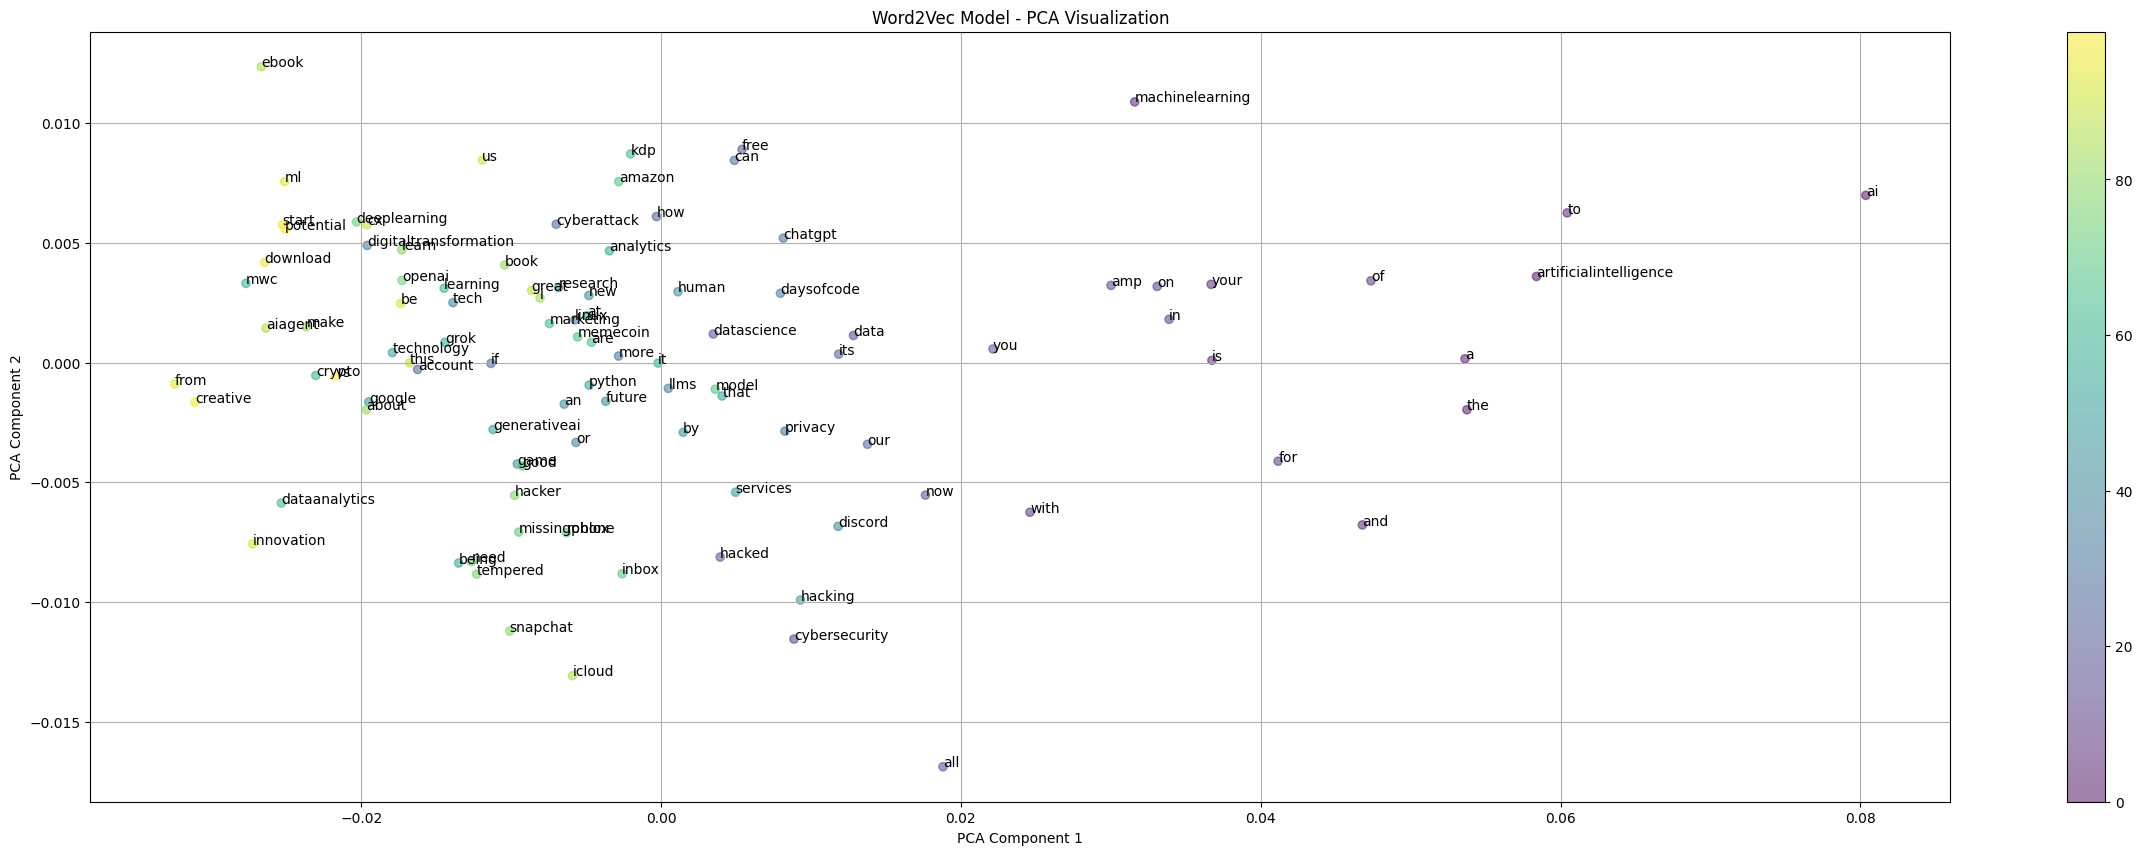

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


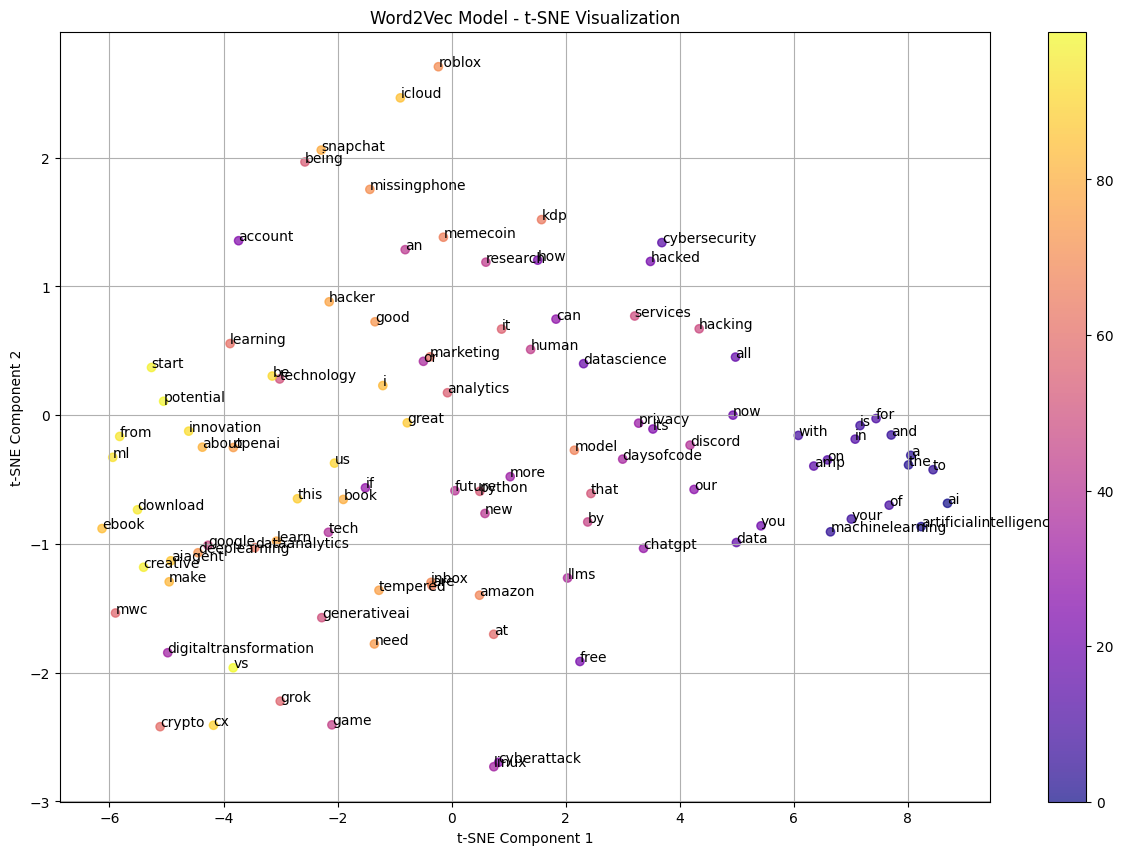

In [18]:
#Ans2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def visualize_word_embeddings(model, embedding_title):
    vocabulary = list(model.wv.index_to_key)[:100]
    embedding_vectors = model.wv[vocabulary]

    color_mapping = np.arange(len(vocabulary))

    # 1. PCA Visualization
    pca = PCA(n_components=2, random_state=42)
    pca_transformed = pca.fit_transform(embedding_vectors)

    plt.figure(figsize=(30, 10))
    pca_scatter = plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1],
                              c=color_mapping, cmap='viridis', alpha=0.5)
    plt.colorbar(pca_scatter)

    # Annotating words on the PCA plot
    for i, word in enumerate(vocabulary):
        plt.annotate(word, (pca_transformed[i, 0], pca_transformed[i, 1]), fontsize=10)

    plt.title(f'{embedding_title} - PCA Visualization')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

    # 2. t-SNE Visualization
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    tsne_transformed = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(15, 10))
    tsne_scatter = plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1],
                               c=color_mapping, cmap='plasma', alpha=0.7)
    plt.colorbar(tsne_scatter)

    # Annotating words on the t-SNE plot
    for i, word in enumerate(vocabulary):
        plt.annotate(word, (tsne_transformed[i, 0], tsne_transformed[i, 1]), fontsize=10)

    plt.title(f'{embedding_title} - t-SNE Visualization')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True)
    plt.show()

visualize_word_embeddings(word2vec_model, 'Word2Vec Model')


In [19]:
#Ans3)
from gensim.models import Word2Vec

# Load the trained model
word2vec_model = Word2Vec.load("word2vec_model.bin")

# Extract word vectors
word_vectors = word2vec_model.wv

# Define word pairs from your dataset
word_pairs = [
    ("ai", "artificialintelligence"),
    ("machinelearning", "datascience"),
    ("cybersecurity", "cyberattack"),
    ("google", "research"),
    ("chatgpt", "llms"),
    ("hacked", "privacy"),
    ("free", "services")
]

# Compute cosine similarity
for word1, word2 in word_pairs:
    if word1 in word_vectors and word2 in word_vectors:
        similarity = word_vectors.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    else:
        print(f"One of the words '{word1}' or '{word2}' is not in the vocabulary!")



Similarity between 'ai' and 'artificialintelligence': 0.9265
Similarity between 'machinelearning' and 'datascience': 0.8191
Similarity between 'cybersecurity' and 'cyberattack': 0.6946
Similarity between 'google' and 'research': 0.5668
Similarity between 'chatgpt' and 'llms': 0.7599
Similarity between 'hacked' and 'privacy': 0.7816
Similarity between 'free' and 'services': 0.7576


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file

#Ans 1) "I would like to perform Sentiment Analysis and Text Classification on the selected dataset."
#Ans 2) The labeling schema follows a sentiment classification approach where each review is categorized as:

'''Positive: If the review expresses strong appreciation, excitement, or praise about the movie.
Negative: If the review expresses disappointment, criticism, or dissatisfaction.
Neutral: If the review is mixed, objective, or does not strongly lean toward positive or negative sentiment.'''

# Link:
https://github.com/AryanPatial/Aryan_INFO5731_Spring2025/blob/main/imdb_reviews_labeled_sentiments.csv


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
# There was nothing difficult as such in this expect some sub questions which were slighly tricky to understand.
# I enjoyed the way questions were given to cover up the basic part of varous concepts of NLP
# The provided time was more that enough for this assignment.